In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(y_train)
print(y_test)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


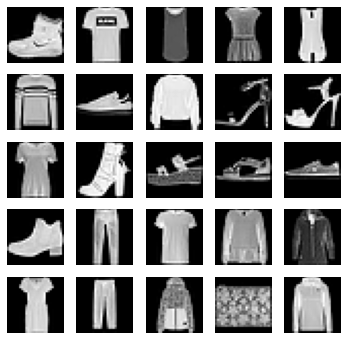

In [14]:
import matplotlib.pyplot as plt

# 25개 이미지 출력

plt.figure(figsize=(6,6))
for index in range(25):
    # 5 행 5열의 index+1 번째 
    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index], cmap="gray")
    plt.axis("off")
    
plt.show()

In [15]:
# 학습데이터 정규화

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 원핫 인코딩은 수행하지 않음
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [16]:
# 모델 구축

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
# 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4044 - accuracy: 0.8560 - val_loss: 0.4000 - val_accuracy: 0.8583
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3591 - accuracy: 0.8703 - val_loss: 0.3590 - val_accuracy: 0.8717
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3347 - accuracy: 0.8777 - val_loss: 0.3468 - val_accuracy: 0.8744
Epoch 4/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3132 - accuracy: 0.8845 - val_loss: 0.3560 - val_accuracy: 0.8734
Epoch 5/30
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2979 - accuracy: 0.8914 - val_loss: 0.3351 - val_accuracy: 0.8786
Epoch 6/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2815 - accuracy: 0.8970 - val_loss: 0.3365 - val_accuracy: 0.8792
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2712 - accuracy: 0.8989 - val_loss: 0.3278 - val_accuracy:

In [20]:
model.evaluate(x_test, y_test)
# 이전에 숫자데이터 보다는 저낮은 정확도를 가진다.

313/313 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.8791


[0.4316805601119995, 0.8791000247001648]

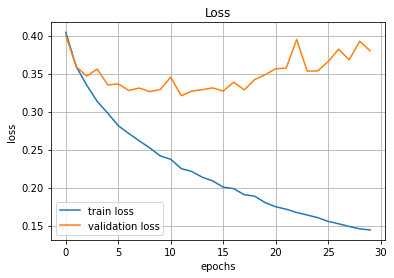

In [21]:
# 손실함수 값
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc="best")

plt.show()

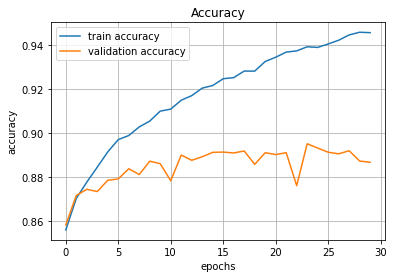

In [22]:
# 정확도
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc="best")

plt.show()

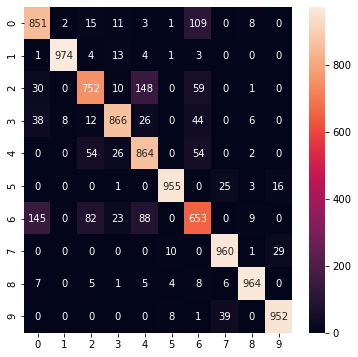

In [26]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(y_test, np.argmax(predicted_value, axis = -1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# 6으로 정의 된 셔츠 이미지를 맞출 확률이 65.3으로 가장 정확도가 낮았다.
